In [13]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from swarm_ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [14]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [15]:
%matplotlib inline

In [25]:
x = np.arange(1, 5, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

In [26]:
mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.06928864 0.57504778 0.58924953]
 [0.57591768 0.2483968  0.23471167]
 [0.71147892 0.80034723 0.98826877]
 [0.16170079 0.26080583 0.08475864]
 [0.14010991 0.12447421 0.53268991]
 [0.25002041 0.11672452 0.54991798]
 [0.13031328 0.21788547 0.53980522]
 [0.27007724 0.38388109 0.7455085 ]
 [0.04416671 0.15113188 0.70203219]
 [0.36964252 0.05130776 0.08385935]
 [0.83732553 0.36938554 0.79718141]
 [0.91191164 0.26491168 0.31759109]
 [0.69500189 0.10067133 0.20587611]
 [0.6087288  0.21986067 0.67850512]
 [0.17688615 0.53718348 0.00715171]
 [0.52822717 0.99486202 0.8707633 ]
 [0.18761129 0.89334519 0.47007502]
 [0.68079555 0.91755765 0.27577111]
 [0.72415937 0.22526682 0.40123403]
 [0.63341833 0.70705793 0.62688444]
 [0.92246483 0.71

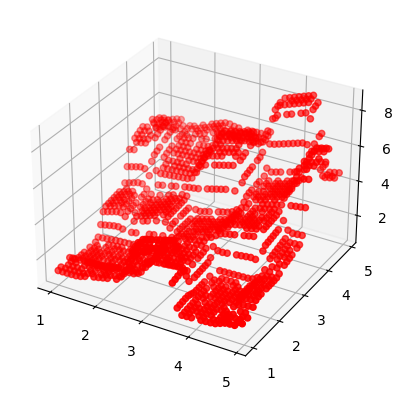

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Current lowest error: 1042.8616: 100%|██████████| 1000/1000 [09:37<00:00,  1.73it/s]

Optymalizacja zakończona!
z blędem:   1042.8615542110583
Liczba it:  1000
TIME elapsed:  577.6431150436401


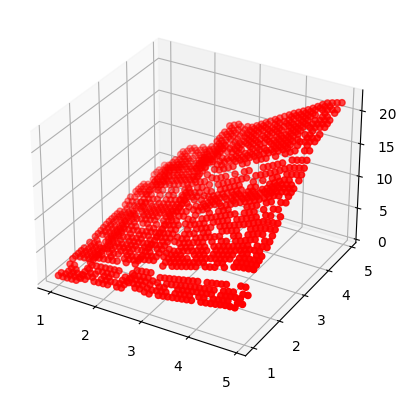

In [28]:
start = time.time()
fis.train(True, True, False, True, n_iter=1000, n_swarmlings=500, first_conf=0.5, second_conf=0.75)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

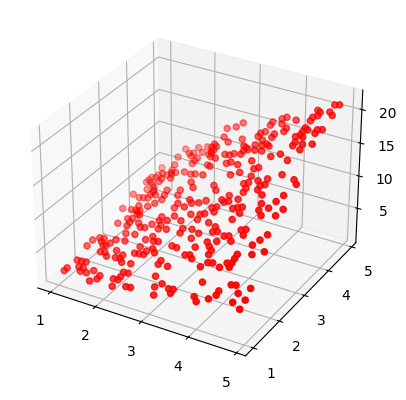

In [29]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

# y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
# y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
mf1 = {"1": [1, 0.25, 0.5, 0.5],
       "2": [2, 0.25, 0.5, 0.5],
       "3": [3, 0.25, 0.5, 0.5],
       "4": [4, 0.25, 0.5, 0.5],
       "5": [5, 0.25, 0.5, 0.5],
}

times = []
confusion_matrices = []
results = []

for test in range(2, 6):
    x = np.arange(1, test, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.zeros(shape=(len(dataX)))

    for sample in range(len(dataX)):
        data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

    varX = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])
    varY = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=1000, n_swarmlings=500, first_conf=0.5, second_conf=0.75)
    end = time.time()

    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = list(map(round,y_pred.flatten()))

    times.append(end - start)
    results.append(result)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

Current lowest error: 7.5167: 100%|██████████| 1000/1000 [02:33<00:00,  6.51it/s]


Optymalizacja zakończona!
z blędem:   7.51671871082722
Liczba it:  1000


Current lowest error: 95.2590: 100%|██████████| 1000/1000 [03:48<00:00,  4.38it/s]


Optymalizacja zakończona!
z blędem:   95.25898749665794
Liczba it:  1000


Current lowest error: 518.1149: 100%|██████████| 1000/1000 [05:37<00:00,  2.96it/s]


Optymalizacja zakończona!
z blędem:   518.114942738722
Liczba it:  1000


Current lowest error: 1066.3322: 100%|██████████| 1000/1000 [08:36<00:00,  1.94it/s]

Optymalizacja zakończona!
z blędem:   1066.3321863059507
Liczba it:  1000


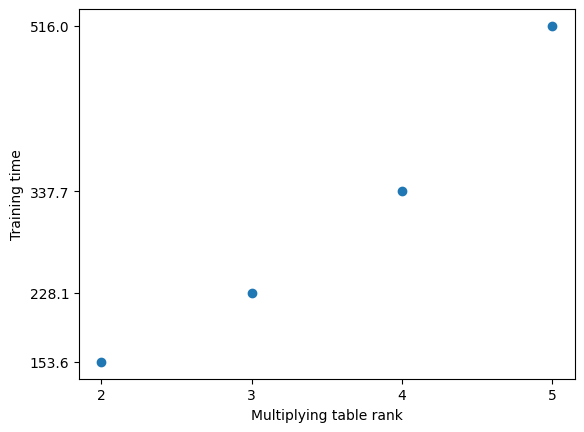

In [22]:
plt.scatter(range(2,6), times)
plt.xlabel('Multiplying table rank')
plt.xticks(range(2,6))
plt.ylabel('Training time')
plt.yticks(times)
plt.show()

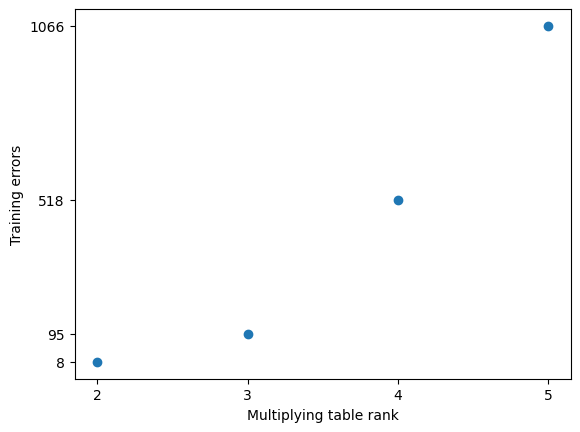

In [23]:
plt.scatter(range(2,6), results)
plt.xlabel('Multiplying table rank')
plt.xticks(range(2,6))
plt.ylabel('Training errors')
plt.yticks(results)
plt.show()